In [9]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
from resnet_FashionMnist import resnet_FashionMnist
from vgg_FashionMnist import vgg

In [10]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg_fashionmnist = vgg(conv_arch)

In [11]:
with torch.cuda.device(0):
    net = vgg_fashionmnist
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  128.81 M, 100.000% Params, 7.57 GMac, 99.821% MACs, 
  (0): Sequential(
    640, 0.000% Params, 38.54 MMac, 0.508% MACs, 
    (0): Conv2d(640, 0.000% Params, 32.11 MMac, 0.424% MACs, 1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 3.21 MMac, 0.042% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 3.21 MMac, 0.042% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    73.86 k, 0.057% Params, 929.66 MMac, 12.262% MACs, 
    (0): Conv2d(73.86 k, 0.057% Params, 926.45 MMac, 12.219% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 1.61 MMac, 0.021% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 1.61 MMac, 0.021% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    885.25 k, 0.687% Params, 2.78 GMac, 36.648% MACs, 
    (0): Conv2d(295.17 k, 0.229% Params, 925.65 MMac, 12.209% MACs, 128, 256, kernel_size=(3,

In [12]:
# find the path
path = os.getcwd()
print('This code is in: ', path)

# find the train_data folder
train_data_path = os.path.join(path, 'Vgg_train_data')
print('The training data are saved in: ', train_data_path)

# find all the folders in the train_data folder
train_data_folders = os.listdir(train_data_path)
print('The folders in the training data folder are: ', train_data_folders)

This code is in:  /home/yj/FinalThesis/GreenAI/GPU/universal
The training data are saved in:  /home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data
The folders in the training data folder are:  ['round3', 'round7', 'round8', 'round2', 'round5', 'round10', 'round4', 'round1', 'round6', 'round9']


In [13]:
subfolder = []
for round in train_data_folders:
    subfolder.append(os.path.join(train_data_path, round))
print('The subfolders are: ', subfolder)

The subfolders are:  ['/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round3', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round7', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round8', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round2', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round5', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round10', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round4', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round1', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round6', '/home/yj/FinalThesis/GreenAI/GPU/universal/Vgg_train_data/round9']


In [14]:
for i in subfolder:
    filesi = os.listdir(i)
    print('The files in the subfolder are: ', filesi)

The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.n

In [15]:
Round = 10
Epoch = 10

In [16]:
Time_AllRound = np.zeros((Round,Epoch,6))
Energy_AllRound = np.zeros((Round,Epoch,1), dtype=object)
TrainTime_AllRound = np.zeros((Round,Epoch,1))
TimeEpoch_AllRound = np.zeros((Round,Epoch,1))
TrainLoss_AllRound = np.zeros((Round,Epoch,1))
TrainAcc_AllRound = np.zeros((Round,Epoch,1))
TestAcc_AllRound = np.zeros((Round,Epoch,1))
TTrainEval_AllRound = np.zeros((Round,Epoch,1))

In [17]:
for round in range(len(subfolder)):
    Time_AllEpochsi = np.load(os.path.join(subfolder[round], 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energy_AllEpochsi = np.load(os.path.join(subfolder[round], 'Energy_AllEpochs.npy'), allow_pickle=True)
    TTrainEvali = np.load(os.path.join(subfolder[round], 'TTrainAccLoss.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainTimei = np.load(os.path.join(subfolder[round], 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    TimeEpochi = np.load(os.path.join(subfolder[round], 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(subfolder[round], 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(subfolder[round], 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(subfolder[round], 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)
    Time_AllRound[round,:,:] = Time_AllEpochsi
    Energy_AllRound[round,:,:] = Energy_AllEpochsi
    TrainTime_AllRound[round,:,:] = TrainTimei
    TimeEpoch_AllRound[round,:,:] = TimeEpochi
    TrainLoss_AllRound[round,:,:] = TrainLossi
    TrainAcc_AllRound[round,:,:] = TrainAcci
    TestAcc_AllRound[round,:,:] = TestAcci
    TTrainEval_AllRound[round,:,:] = TTrainEvali

#### Time_AllRound

In [18]:
print(Time_AllRound.shape)

(10, 10, 6)


对10个epoch的数据要进行平均

In [19]:
# sum the Time_AllRound according to the epochs
Time_AllRoundSum = np.sum(Time_AllRound, axis=0)
# print(Time_AllRoundSum.shape)
# print(Time_AllRoundSum)
print('*'*50)
# each point divide by the number of rounds
Time_AllRoundAvg = Time_AllRoundSum/Round
print(Time_AllRoundAvg.shape)
print(Time_AllRoundAvg)

**************************************************
(10, 6)
[[ 2.02994549 41.78207037  0.11294456 86.46936402  0.38044472  7.57151072]
 [ 2.0242615  41.81350672  0.11160393 86.55380831  0.37868369  7.57190299]
 [ 2.02524555 41.80086164  0.10835485 86.55840778  0.37867908  7.57725966]
 [ 2.02804048 41.81054506  0.10699761 86.55638566  0.38103387  7.57379081]
 [ 2.0291754  41.81916237  0.10792792 86.56838119  0.38206987  7.57645357]
 [ 2.0269331  41.83092256  0.1099453  86.58935182  0.38278518  7.58304188]
 [ 2.02844605 41.8159066   0.10706236 86.58442254  0.3818584   7.57454886]
 [ 2.0291949  41.817924    0.10436842 86.591728    0.37978702  7.5819073 ]
 [ 2.02885702 41.82314     0.10936611 86.5868876   0.37968452  7.58167729]
 [ 2.02915416 41.82479053  0.10851943 86.5940609   0.37980413  7.58505924]]


In [20]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllRoundAvg[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllRoundAvg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllRoundAvg[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllRoundAvg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllRoundAvg[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllRoundAvg[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.02994549 2.0242615  2.02524555 2.02804048 2.0291754  2.0269331
 2.02844605 2.0291949  2.02885702 2.02915416] 
 The Forward time of all epoch: 
 [41.78207037 41.81350672 41.80086164 41.81054506 41.81916237 41.83092256
 41.8159066  41.817924   41.82314    41.82479053] 
 The Calculate Loss time of all epoch: 
 [0.11294456 0.11160393 0.10835485 0.10699761 0.10792792 0.1099453
 0.10706236 0.10436842 0.10936611 0.10851943] 
 The Backward time of all epoch: 
 [86.46936402 86.55380831 86.55840778 86.55638566 86.56838119 86.58935182
 86.58442254 86.591728   86.5868876  86.5940609 ] 
 The Optimize time of all epoch: 
 [0.38044472 0.37868369 0.37867908 0.38103387 0.38206987 0.38278518
 0.3818584  0.37978702 0.37968452 0.37980413] 
 The Test time of all epoch: 
 [7.57151072 7.57190299 7.57725966 7.57379081 7.57645357 7.58304188
 7.57454886 7.5819073  7.58167729 7.58505924]


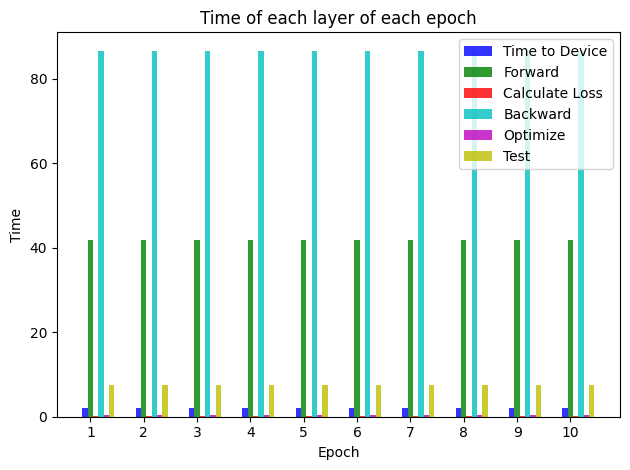

In [21]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllRoundAvg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllRoundAvg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllRoundAvg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllRoundAvg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllRoundAvg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllRoundAvg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

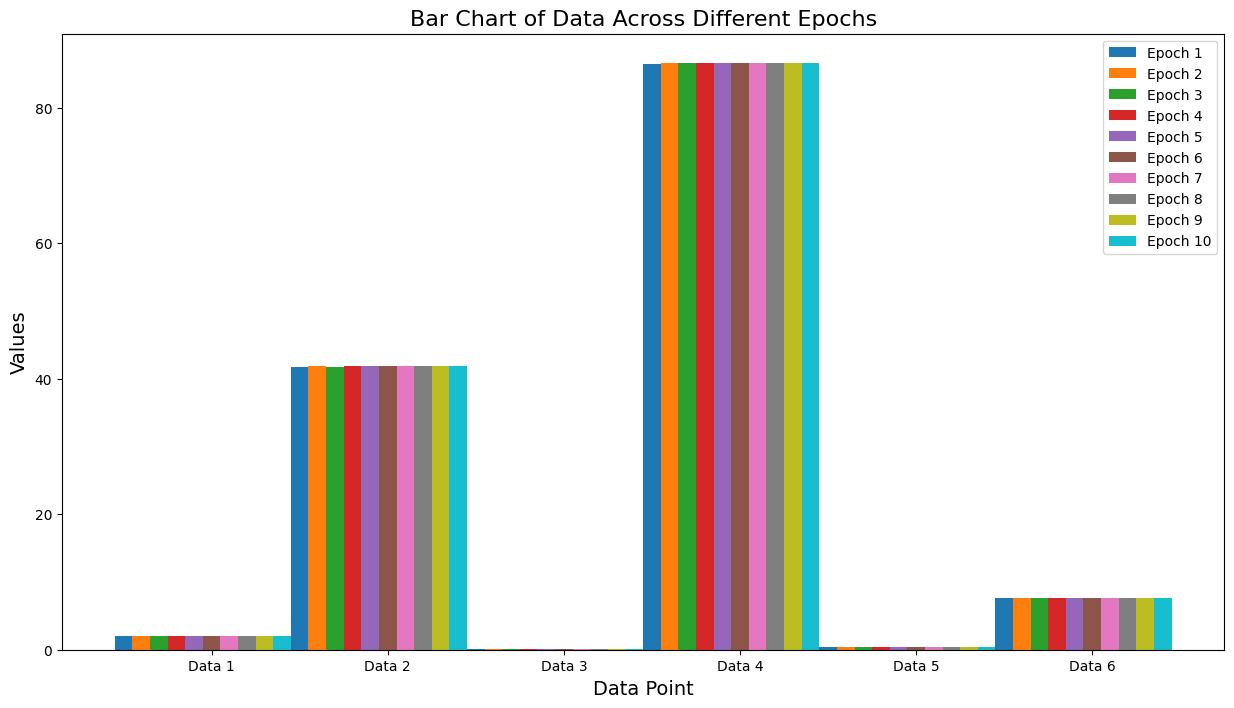

In [22]:
# Number of epochs
epochs = Time_AllRoundAvg.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllRoundAvg.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllRoundAvg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllRoundAvg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

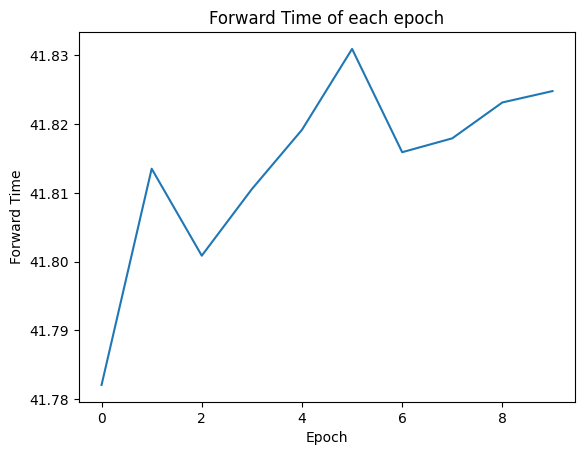

In [23]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

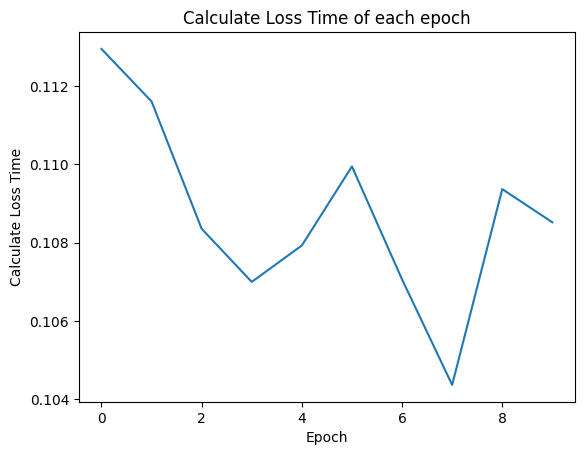

In [24]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

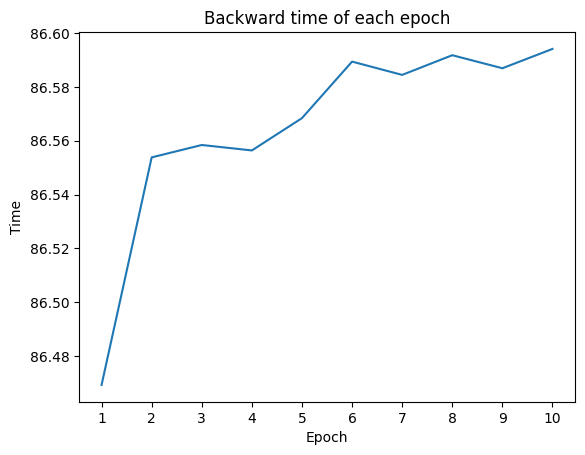

In [25]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

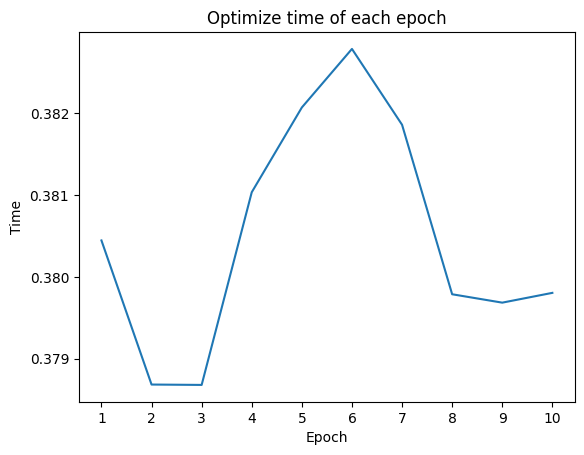

In [26]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

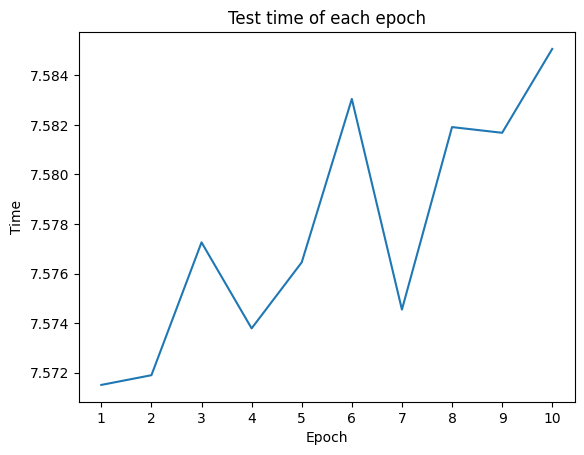

In [27]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllRound 

In [28]:
print(Energy_AllRound.shape)
# create a ndarray to store the average running time of each epoch
TimeRecorded_Total = np.zeros((Round,Epoch,1))
EnergyRecorded = np.zeros((Round,Epoch,1))
for i in range(len(Energy_AllRound)):
    # print('In round ', i+1, ': \n')
    for j in range(len(Energy_AllRound[i])):
        # print('Epoch ', j+1, 'The total recorded time is: ', len(Energy_AllRound[i][j][0]))
        TimeRecorded_Total[i,j,0] = len(Energy_AllRound[i][j][0])
        EnergyRecorded[i,j,0] = np.sum(Energy_AllRound[i][j][0])

(10, 10, 1)


In [29]:
print(TimeRecorded_Total.shape)
# print(TimeRecorded_Total)
TimeRecorded_Avg = np.sum(TimeRecorded_Total, axis=0)/Round
print(TimeRecorded_Avg.shape)
print(TimeRecorded_Avg.T)

print(EnergyRecorded.shape)
# print(EnergyRecorded)
EnergyRecorded_Avg = np.sum(EnergyRecorded, axis=0)/Round
print(EnergyRecorded_Avg.shape)
print(EnergyRecorded_Avg.T)

(10, 10, 1)
(10, 1)
[[141.8 141.9 141.9 141.9 142.  142.  142.  142.  142.  142. ]]
(10, 10, 1)
(10, 1)
[[11280.544 11298.536 11299.485 11297.734 11305.605 11305.438 11304.847
  11307.104 11308.395 11308.155]]


In [36]:
# calculate the total energy of each round
Energy_Total = np.sum(EnergyRecorded_Avg, axis=0)
print('The average total energy consumption of each round running is: ', Energy_Total, 'J')

# calculate the total time of each round
Time_Total = np.sum(TimeRecorded_Avg, axis=0)
print('The average total time of each round running is: ', Time_Total, 's')

The average total energy consumption of each round running is:  [113015.843] J
The average total time of each round running is:  [1419.5] s


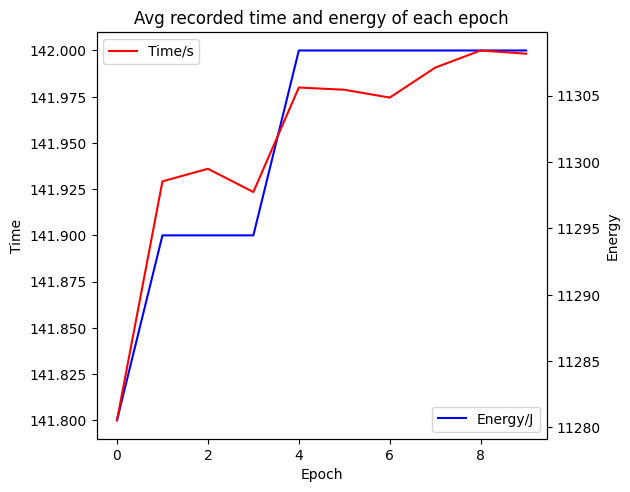

In [30]:
# plot the avg recorded time of each epoch and energy using matplotlib with line in one figure, the left axis is the time and the right axis is the energy
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.plot(TimeRecorded_Avg, color='b')
plt.legend(['Energy/J'], loc='lower right')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
ax2.plot(EnergyRecorded_Avg, color='r')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.title('Avg recorded time and energy of each epoch')
plt.legend(['Time/s'], loc='upper left')
plt.show()

#### TimeEpoch_AllRound

In [31]:
print(TimeEpoch_AllRound.shape)
# print(TimeEpoch_AllRound)

TimeEpoch_Round = np.zeros((Round,Epoch,1))
for i in range(TimeEpoch_AllRound.shape[0]):
    TimeEpoch_Roundi = TimeEpoch_AllRound[i,:,:]
    # print(TimeEpoch_Roundi.shape)
    time_temp = np.zeros((TimeEpoch_Roundi.shape[0],1))
    for j in range(TimeEpoch_Roundi.shape[0]):
        if j == 0:
            time_temp[j,0] = TimeEpoch_Roundi[j,0]
        else:
            time_temp[j,0] = TimeEpoch_Roundi[j,0] - TimeEpoch_Roundi[j-1,0]
    TimeEpoch_Round[i,:,:] = time_temp
    
print(TimeEpoch_Round.shape)
# print(TimeEpoch_Round)
TimeEpoch_RoundAvg = np.sum(TimeEpoch_Round, axis=0)/Round
print(TimeEpoch_RoundAvg.shape)
print('The average time of each epoch is: \n', TimeEpoch_RoundAvg.T)

(10, 10, 1)
(10, 10, 1)
(10, 1)
The average time of each epoch is: 
 [[141.31868815 141.41745012 141.41143675 141.42287614 141.45816493
  141.49873846 141.47096689 141.47013593 141.48018522 141.49475908]]


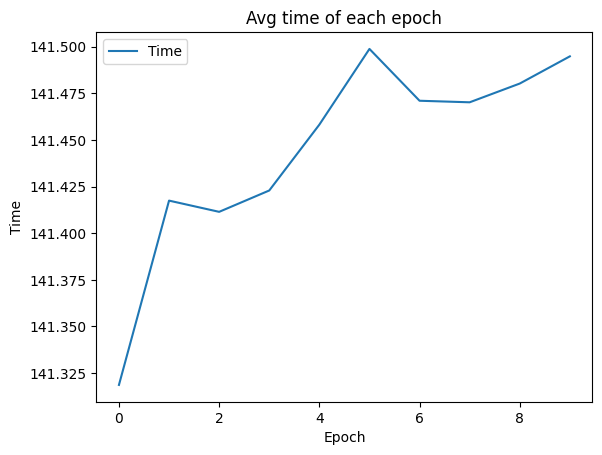

In [32]:
# plot the avg time of each epoch using matplotlib with line in one figure
plt.plot(TimeEpoch_RoundAvg)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Avg time of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### train loss, acc and test acc

In [33]:
print(TrainLoss_AllRound.shape)
print(TrainAcc_AllRound.shape)
print(TestAcc_AllRound.shape)

(10, 10, 1)
(10, 10, 1)
(10, 10, 1)


In [34]:
# get the average train loss of each epoch
TrainLoss_RoundAvg = np.sum(TrainLoss_AllRound, axis=0)/Round
print(TrainLoss_RoundAvg.shape)
print('The avg train loss of each epoch is: \n', TrainLoss_RoundAvg.T)

# get the average train accuracy of each epoch
TrainAcc_RoundAvg = np.sum(TrainAcc_AllRound, axis=0)/Round
print(TrainAcc_RoundAvg.shape)
print('The avg train acc of each epoch is: \n', TrainAcc_RoundAvg.T)

# get the average test accuracy of each epoch
TestAcc_RoundAvg = np.sum(TestAcc_AllRound, axis=0)/Round
print(TestAcc_RoundAvg.shape)
print('The avg test acc of each epoch is: \n',TestAcc_RoundAvg.T)

(10, 1)
The avg train loss of each epoch is: 
 [[0.5794026  0.33433923 0.27237561 0.23213136 0.20102322 0.17457538
  0.14873897 0.12454711 0.10115839 0.08039937]]
(10, 1)
The avg train acc of each epoch is: 
 [[0.79709333 0.87910333 0.90191833 0.91681667 0.928325   0.93858167
  0.9484     0.95775167 0.96644667 0.97423667]]
(10, 1)
The avg test acc of each epoch is: 
 [[0.79445 0.86612 0.87256 0.88478 0.89018 0.8895  0.89313 0.88796 0.89323
  0.89312]]


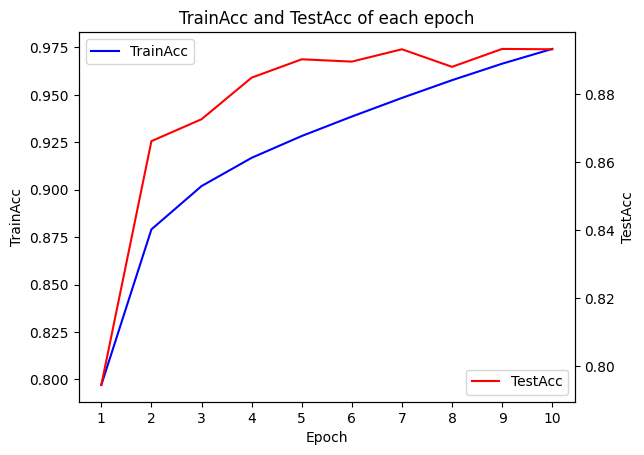

In [35]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc_RoundAvg, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc_RoundAvg, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
